In [2]:
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


# Parte 1: Carga y Exploración Inicial de Datos

## 1. Carga del Dataset:
* Cargar el dataset desde Kaggle.

In [3]:
ruta = '../data/heart.csv'
df = pd.read_csv(filepath_or_buffer= ruta, sep=',')
df.shape

(303, 14)

## 2. Exploración Inicial:
* Revisar la estructura del dataset.
* Describir las variables y su distribución.
* Identificar y documentar valores faltantes y outliers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* age: Edad del paciente	
* sex: Sexo del paciente
* cp: Tipo de dolor en el pecho
* trestbps: Presión arterial en reposo
* chol: Colesterol sérico en sangre	
* fbs: Azúcar en sangre en ayunas
* restecg: Electrocardiograma en reposo
* thalach: Frecuencia cardíaca máxima alcanzada durante el ejercicio
* exang: Angina inducida por el ejercicio
* oldpeak: Depresión del segmento ST inducida por el ejercicio	
* slope: Pendiente del segmento ST	
* ca: Número de vasos sanguíneos principales afectados
* thal: Tipo de talasemia
* target: Enfermedad cardíaca (variable objetivo)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

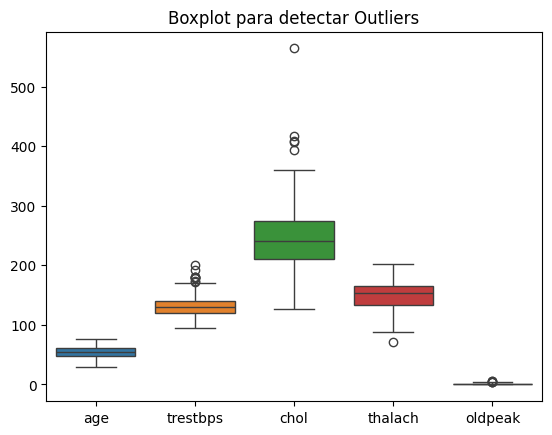

In [6]:
# Identificar los outliers usando un boxplot
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplot para detectar Outliers')
plt.show()

# Parte 2: Análisis Exploratorio de Datos (EDA)

## 1. Análisis Estadístico Descriptivo:
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).
* Analizar la distribución de las variables categóricas.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# Analizar la distribución de las variables categóricas con tablas de frecuencia
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Imprimir las frecuencias de cada categoría
for column in categorical_columns:
    print(f"Distribución de {column}:")
    print(df[column].value_counts())
    print("\n")

Distribución de sex:
sex
1    207
0     96
Name: count, dtype: int64


Distribución de cp:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


Distribución de fbs:
fbs
0    258
1     45
Name: count, dtype: int64


Distribución de restecg:
restecg
1    152
0    147
2      4
Name: count, dtype: int64


Distribución de exang:
exang
0    204
1     99
Name: count, dtype: int64


Distribución de slope:
slope
2    142
1    140
0     21
Name: count, dtype: int64


Distribución de ca:
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


Distribución de thal:
thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64


Distribución de target:
target
1    165
0    138
Name: count, dtype: int64




## 2. Visualizaciones:
* Crear histogramas y gráficos de barras para entender la distribución de las variables.
* Crear un mapa de calor para visualizar las correlaciones entre las variables.
* Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

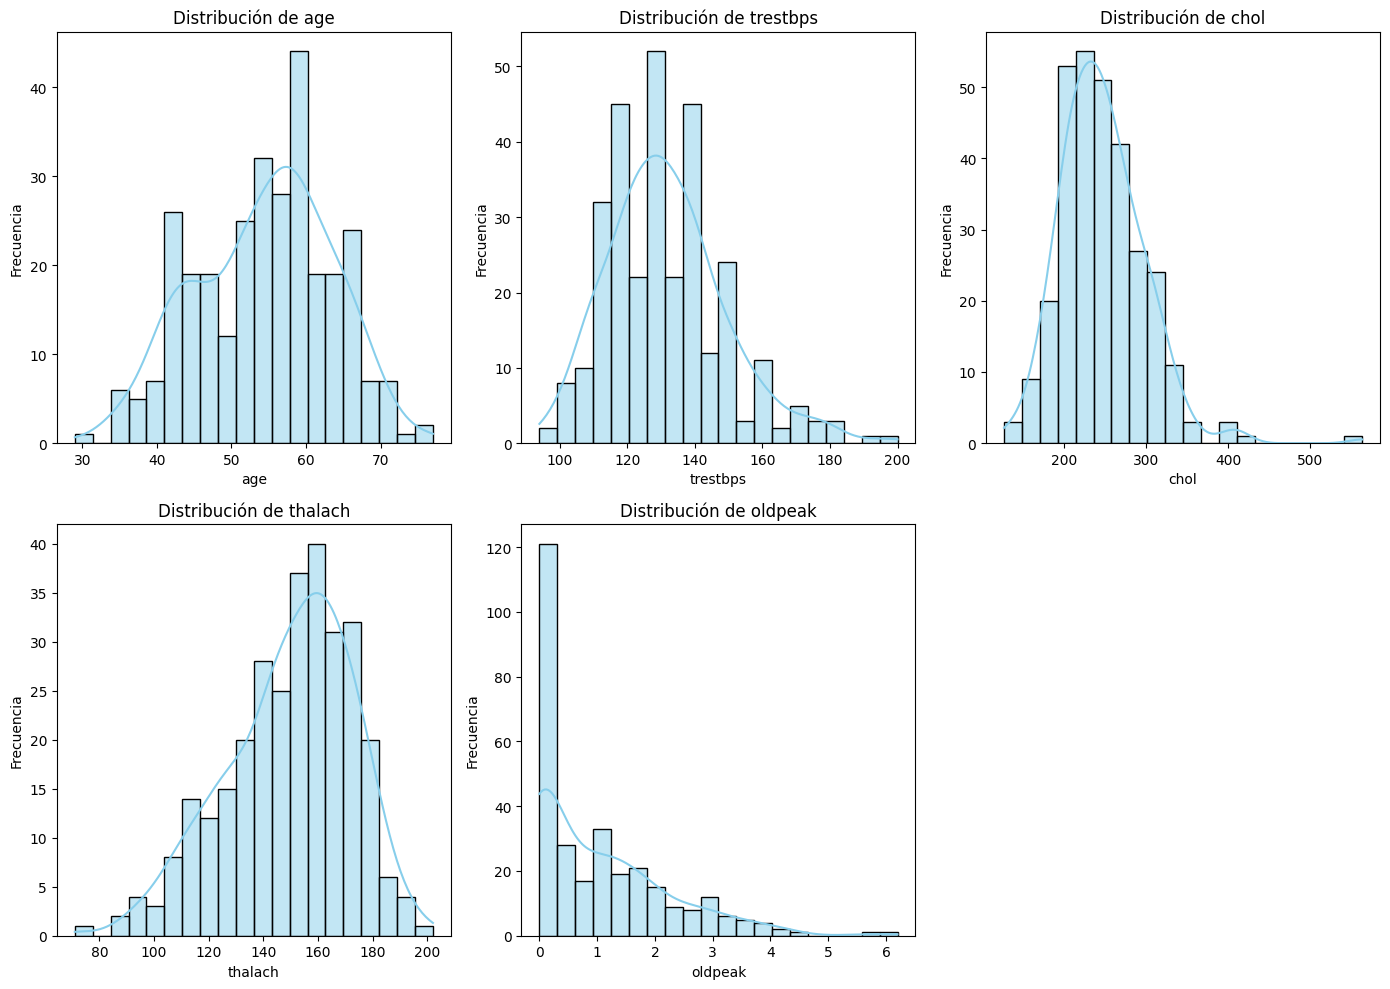

In [9]:
# Lista de variables numéricas
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Crear un gráfico de histogramas para las variables numéricas
plt.figure(figsize=(14, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Gráfico en una cuadrícula 2x3
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')  # Histograma con KDE
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

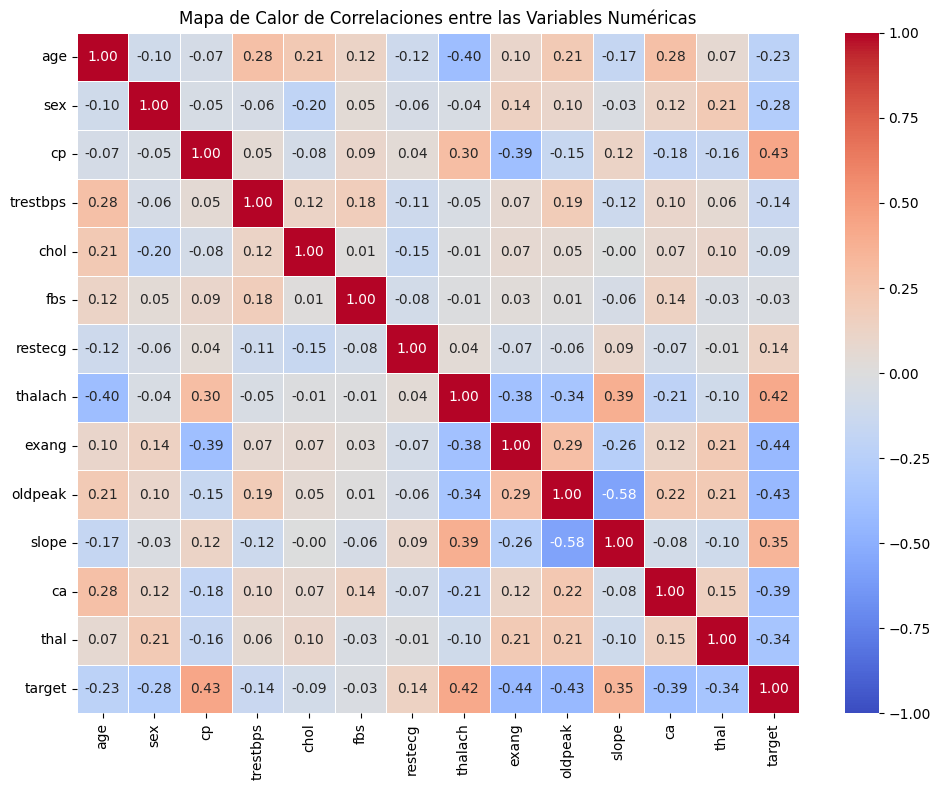

In [10]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Añadir título
plt.title('Mapa de Calor de Correlaciones entre las Variables Numéricas')

# Mostrar el mapa de calor
plt.tight_layout()
plt.show()

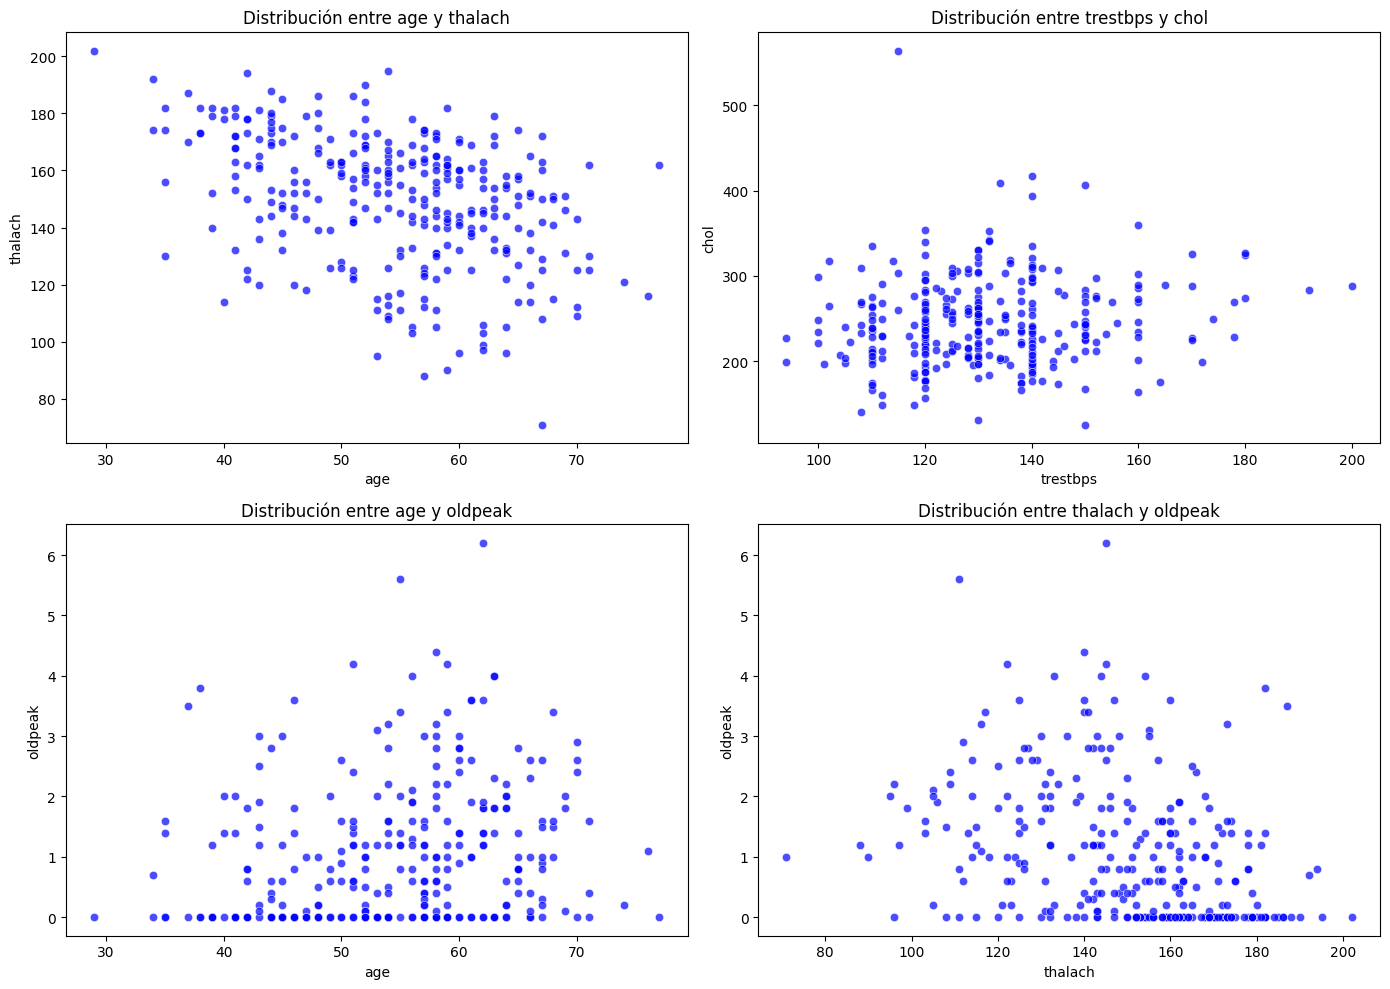

In [11]:
# Variables que queremos analizar con gráficos de dispersión
scatter_pairs = [
    ('age', 'thalach'),    # Edad vs. Frecuencia Cardíaca Máxima
    ('trestbps', 'chol'),  # Presión Arterial vs. Colesterol
    ('age', 'oldpeak'),    # Edad vs. Antigüedad del Pico ST
    ('thalach', 'oldpeak') # Frecuencia Cardíaca Máxima vs. Antigüedad del Pico ST
]

# Crear los gráficos de dispersión
plt.figure(figsize=(14, 10))

for i, (x, y) in enumerate(scatter_pairs, 1):
    plt.subplot(2, 2, i)  # Cuadrícula de 2x2 para los gráficos
    sns.scatterplot(x=df[x], y=df[y], color='b', alpha=0.7)
    plt.title(f'Distribución entre {x} y {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

## 3. Valores Faltantes y Outliers:
* Detectar y tratar valores faltantes.
* Identificar y manejar outliers.

In [12]:
# Identificar valores faltantes en el dataset
missing_values = df.isnull().sum()

# Mostrar columnas con valores faltantes
print("Valores faltantes por columna:")
print(missing_values[missing_values > 0])

Valores faltantes por columna:
Series([], dtype: int64)


In [13]:
# Calcular el IQR para cada variable numérica
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers (valores fuera de 1.5 * IQR)
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Mostrar los outliers
print("Outliers detectados:")
print(outliers.sum())


Outliers detectados:
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


No se eliminan los outliers por tratarse de datos sensibles que puede tener algun tipo de incidencia en el resultado final

# Parte 3: Preprocesamiento de Datos

## 1. Transformación de Columnas:
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

In [14]:
# Realizamos One-Hot Encoding en las columnas categóricas del dataset
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

# Mostrar el DataFrame resultante
print(df_encoded.head())

   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_1   cp_2   cp_3  \
0   63       145   233      150      2.3       1   True  False  False   True   
1   37       130   250      187      3.5       1   True  False   True  False   
2   41       130   204      172      1.4       1  False   True  False  False   
3   56       120   236      178      0.8       1   True   True  False  False   
4   57       120   354      163      0.6       1  False  False  False  False   

   ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  thal_1  thal_2  \
0  ...    False    False    False  False  False  False  False    True   False   
1  ...    False    False    False  False  False  False  False   False    True   
2  ...    False    False     True  False  False  False  False   False    True   
3  ...    False    False     True  False  False  False  False   False    True   
4  ...     True    False     True  False  False  False  False   False    True   

   thal_3  
0   False  
1   Fals

In [15]:
# Seleccionamos las columnas numéricas del dataset
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos y transformamos los datos numéricos
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Mostrar las primeras filas del dataset escalado
print(df_encoded.head())

        age  trestbps      chol   thalach   oldpeak  target  sex_1   cp_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1   True  False   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1   True  False   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1  False   True   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1   True   True   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1  False  False   

    cp_2   cp_3  ...  exang_1  slope_1  slope_2   ca_1   ca_2   ca_3   ca_4  \
0  False   True  ...    False    False    False  False  False  False  False   
1   True  False  ...    False    False    False  False  False  False  False   
2  False  False  ...    False    False     True  False  False  False  False   
3  False  False  ...    False    False     True  False  False  False  False   
4  False  False  ...     True    False     True  False  False  False  False   

   thal_1  thal_2  thal_3  
0    True   False   False  
1   Fa

## 2. División del Conjunto de Datos:
* Dividir el dataset en conjuntos de entrenamiento y prueba.

In [16]:
# Suponiendo que df_encoded es el DataFrame preprocesado
X = df_encoded.drop('target', axis=1)  # Variables predictoras
y = df_encoded['target']  # Variable objetivo

In [17]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (242, 22)
Dimensiones de X_test: (61, 22)
Dimensiones de y_train: (242,)
Dimensiones de y_test: (61,)


# Parte 4: Implementación de XGBoost

## 1. Entrenamiento del Modelo:
* Entrenar un modelo de XGBoost con hiperparámetros básicos.
* Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

In [18]:
# Inicializamos el modelo XGBoost con parámetros básicos
xg_model = xgb.XGBClassifier(
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje (cuánto se ajustan los árboles)
    max_depth=6,  # Profundidad máxima de cada árbol
    random_state=42  # Para reproducibilidad
)

# Entrenamos el modelo con los datos de entrenamiento
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [19]:
# Realizar predicciones en el conjunto de prueba
y_pred = xg_model.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.4f}')

# Mostrar el reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Exactitud del modelo: 0.8197

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Matriz de confusión:
[[25  4]
 [ 7 25]]


In [20]:
# Realizar predicciones en el conjunto de prueba
y_pred = xg_model.predict(X_test)
y_pred_prob = xg_model.predict_proba(X_test)[:, 1]  # Probabilida

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Exactitud: {accuracy:.4f}')
print(f'Precisión: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Exactitud: 0.8197
Precisión: 0.8621
Recall: 0.7812
F1-Score: 0.8197
ROC-AUC: 0.9084


In [22]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61




Matriz de Confusión:
[[25  4]
 [ 7 25]]


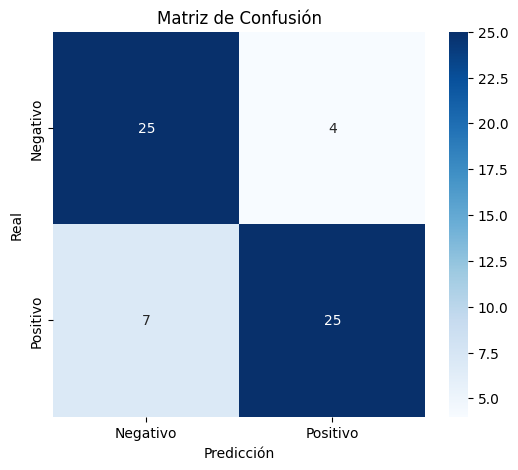

In [23]:
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar la matriz de confusión usando Seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

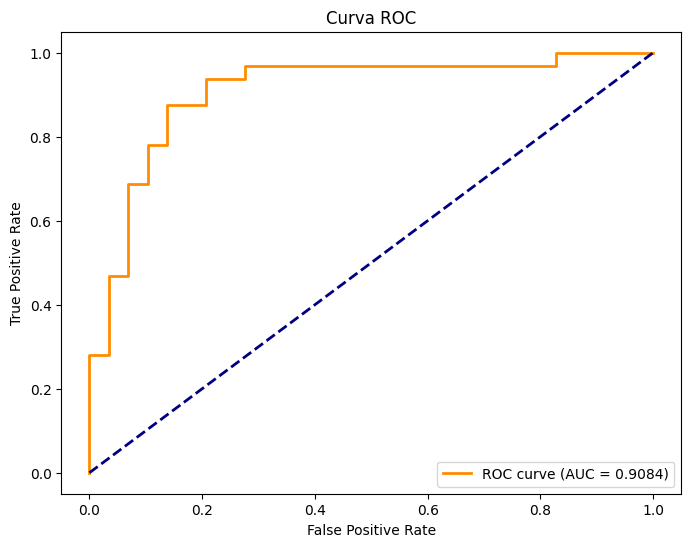

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea de referencia (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


## 2. Optimización de Hiperparámetros:
* Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

In [ ]:
# Configuración de los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 6, 9],  # Profundidad máxima de los árboles
    'min_child_weight': [1, 3, 5],  # Peso mínimo de los nodos hoja
    'subsample': [0.6, 0.8, 1.0],  # Proporción de muestras para entrenar
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proporción de características a considerar por árbol
    'gamma': [0, 0.1, 0.2]  # Regularización
}

# Inicializar el modelo de XGBoost
xg_model = xgb.XGBClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


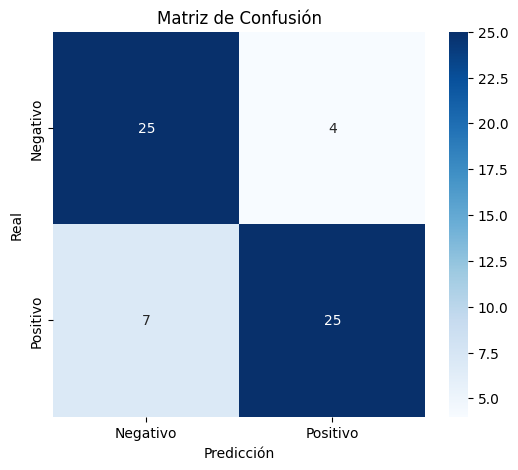

In [42]:
# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [43]:
# Ver los mejores hiperparámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)

# Mejor modelo (con los hiperparámetros óptimos)
best_model = grid_search.best_estimator_

# Evaluar el rendimiento con el conjunto de prueba
y_pred = best_model.predict(X_test)

# Métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Exactitud: {accuracy_score(y_test, y_pred):.4f}')
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Mejores parámetros: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
Exactitud: 0.8033

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61


Matriz de Confusión:
[[25  4]
 [ 8 24]]


## 3. Evaluación del Modelo Optimizado:
* Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.

Modelo Inicial:
Exactitud: 0.8361

Reporte de clasificación del modelo inicial:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Matriz de Confusión del modelo inicial:
[[25  4]
 [ 6 26]]


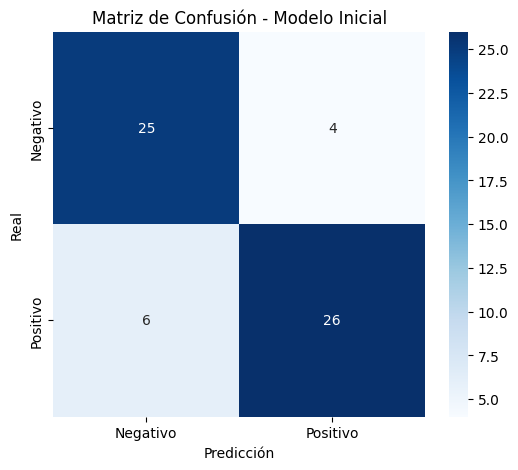

In [44]:
# Crear un modelo XGBoost inicial (sin optimización)
xg_model_initial = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo sin optimización de hiperparámetros
xg_model_initial.fit(X_train, y_train)

# Realizar predicciones con el modelo inicial
y_pred_initial = xg_model_initial.predict(X_test)

# Evaluar el rendimiento del modelo inicial
print("Modelo Inicial:")
print(f'Exactitud: {accuracy_score(y_test, y_pred_initial):.4f}')
print("\nReporte de clasificación del modelo inicial:")
print(classification_report(y_test, y_pred_initial))
print("\nMatriz de Confusión del modelo inicial:")
print(confusion_matrix(y_test, y_pred_initial))

# Visualizar la matriz de confusión para el modelo inicial
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_initial), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión - Modelo Inicial")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [49]:
# Configuración de los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 6],  # Profundidad máxima de los árboles
    'min_child_weight': [1, 3],  # Peso mínimo de los nodos hoja
    'subsample': [0.6, 1.0],  # Proporción de muestras para entrenar
    'colsample_bytree': [0.8, 1.0],  # Proporción de características a considerar por árbol
    'gamma': [0, 0.1]  # Regularización
}

# Inicializar el modelo de XGBoost
xg_model = xgb.XGBClassifier(random_state=42)
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xg_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)
# Ejecutar GridSearchCV
grid_search.fit(X_train, y_train)
# Ver los mejores hiperparámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)

# Mejor modelo (con los hiperparámetros óptimos)
best_model = grid_search.best_estimator_
# Realizar predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


Mejores parámetros: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}


In [50]:
# Evaluar el rendimiento del modelo optimizado
print("Modelo Optimizado:")
print(f'Exactitud: {accuracy_score(y_test, y_pred_best):.4f}')
print("\nReporte de clasificación del modelo optimizado:")
print(classification_report(y_test, y_pred_best))
print("\nMatriz de Confusión del modelo optimizado:")
print(confusion_matrix(y_test, y_pred_best))

Modelo Optimizado:
Exactitud: 0.8361

Reporte de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Matriz de Confusión del modelo optimizado:
[[26  3]
 [ 7 25]]


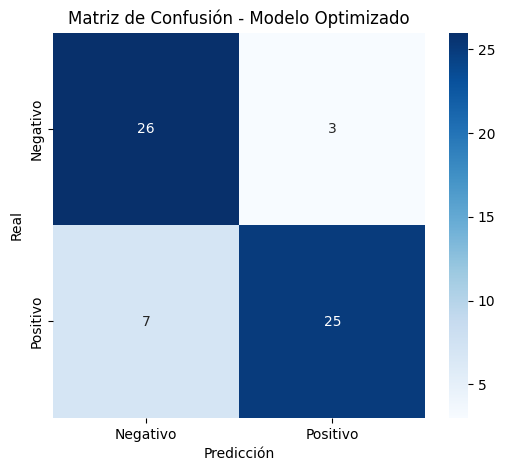

In [51]:
# Visualizar la matriz de confusión para el modelo optimizado
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [52]:
# Comparación entre el modelo inicial y el optimizado

print("Comparación de Resultados:")
print("\nModelo Inicial:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_initial):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_initial):.4f}")

print("\nModelo Optimizado:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.4f}")

Comparación de Resultados:

Modelo Inicial:
Exactitud: 0.8361
F1-Score: 0.8387

Modelo Optimizado:
Exactitud: 0.8361
F1-Score: 0.8333


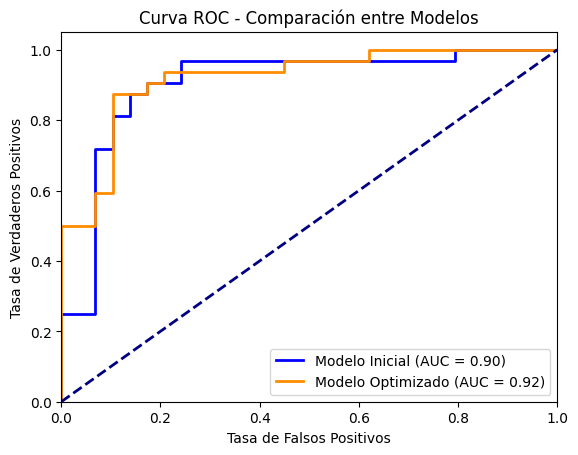

In [53]:
# Curva ROC para el modelo inicial
fpr_initial, tpr_initial, _ = roc_curve(y_test, xg_model_initial.predict_proba(X_test)[:, 1])
roc_auc_initial = auc(fpr_initial, tpr_initial)

# Curva ROC para el modelo optimizado
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_best = auc(fpr_best, tpr_best)

# Graficar ambas curvas ROC
plt.figure()
plt.plot(fpr_initial, tpr_initial, color='blue', lw=2, label=f'Modelo Inicial (AUC = {roc_auc_initial:.2f})')
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'Modelo Optimizado (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Comparación entre Modelos')
plt.legend(loc='lower right')
plt.show()